# Building Energy Rating Analysis and Prediction

## Setup

libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

Check path of working directory

In [2]:

%pwd



'd:\\Colleges\\DCU\\A.I\\Data Analysis\\project\\BER'

change wd to file location

In [3]:
%cd "d:/Colleges/DCU/A.I/Data Analysis/"

d:\Colleges\DCU\A.I\Data Analysis


Data downloaded from Sustainable Energy Authority Ireland
https://ndber.seai.ie/BERResearchTool/ber/search.aspx

Data was rewritten from a .txt file into a .csv file to read into python.

In [4]:

df = pd.read_csv('project/BER/ber.csv', low_memory = False)
#46seconds

Check file loaded correctly

In [47]:
df.shape
df.groupby(['EnergyRating']).count()


,Unnamed: 0,index,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,...,ThirdWallAgeBandId,ThirdWallTypeId,SA_Code,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
EnergyRating,,,,,,,,,,,,,,,,,,,,,
A1,967,967,967,967,967,967,967,967,967,967,...,122,123,296,296,296,640,640,640,933,933
A2,44977,44977,44977,44977,44977,44977,44977,44977,44977,44977,...,4445,4452,7615,7615,7615,23336,23336,23336,44723,44723
A3,57818,57818,57818,57818,57818,57818,57818,57818,57818,57818,...,6668,6828,22906,22906,22906,9926,9926,9926,55709,55709
B1,15435,15435,15435,15435,15435,15435,15435,15435,15435,15435,...,2294,2880,11435,11435,11435,3480,3480,3480,9285,9285
B2,33561,33561,33561,33561,33561,33561,33561,33561,33561,33561,...,5154,6212,26690,26690,26690,6863,6863,6863,11390,11390
B3,77900,77900,77900,77900,77900,77900,77900,77900,77900,77900,...,12260,13526,64926,64926,64926,12876,12876,12876,18575,18575
C1,113822,113822,113822,113822,113822,113822,113822,113822,113822,113822,...,17384,18016,96801,96801,96801,14664,14664,14664,20467,20467
C2,123993,123993,123993,123993,123993,123993,123993,123993,123993,123993,...,19348,19570,105174,105174,105174,13896,13896,13896,18950,18950
C3,117541,117541,117541,117541,117541,117541,117541,117541,117541,117541,...,19829,19929,97604,97604,97604,12176,12176,12176,16514,16514


In [6]:
df.head()

,Unnamed: 0,index,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,...,ThirdWallAgeBandId,ThirdWallTypeId,SA_Code,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
0,1,1,Co. Kerry,Detached house,1996,Existing,C3,202.72,262.98,0.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Co. Donegal,Semi-detached house,2004,Existing,C2,184.06,118.14,0.55,...,NaN,NaN,57106026,0.000222,0.012347,NaN,NaN,NaN,NaN,NaN
2,3,3,Co. Kildare,End of terrace house,1970,Existing,D2,273.58,78.04,0.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,Dublin 8,Mid-floor apartment,2000,Existing,E2,361.76,46.92,0.72,...,9.0,11.0,268085004,0.000320,0.012347,NaN,NaN,NaN,NaN,NaN
4,5,5,Co. Roscommon,Detached house,1981,Existing,B3,139.61,182.66,0.43,...,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Summary Statistics

In [7]:
df.describe()


,Unnamed: 0,index,Year_of_Construction,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,...,ThirdWallUValue,ThirdWallAgeBandId,ThirdWallTypeId,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
count,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,...,180877.000000,176360.000000,180516.000000,7.674620e+05,767462.000000,137865.000000,137865.000000,137865.000000,250431.000000,250431.000000
mean,5.057780e+05,5.057780e+05,1.983602e+03,2.369574e+02,1.134012e+02,6.690783e-01,3.755117e-01,4.317214e-01,2.611958e+00,2.399085e+00,...,0.781850,6.440888,6.358112,1.863817e-02,0.021077,0.122511,20558.034605,1648.581893,1.032138,0.961093
std,2.920109e+05,2.920109e+05,3.365266e+01,1.776136e+02,5.930509e+01,5.633919e-01,5.013500e-01,2.513896e-01,8.565985e-01,1.022362e+00,...,0.632851,3.048832,3.010487,4.481518e-02,0.028883,0.196335,16989.325684,3457.050510,0.969813,0.755433
min,1.000000e+00,1.000000e+00,1.753000e+03,-1.584200e+02,5.470000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.010000,0.000000,1.000000,5.642000e-09,0.002500,0.000000,0.000000,-38584.300000,-3.025000,-0.347000
25%,2.528895e+05,2.528895e+05,1.973000e+03,1.563000e+02,7.765000e+01,3.000000e-01,1.300000e-01,2.900000e-01,2.200000e+00,1.710000e+00,...,0.339000,4.000000,4.000000,1.737855e-06,0.002500,0.000000,8711.740000,0.000000,0.341000,0.371000
50%,5.057780e+05,5.057780e+05,1.997000e+03,2.088500e+02,9.987000e+01,5.200000e-01,2.200000e-01,4.100000e-01,2.700000e+00,3.000000e+00,...,0.550000,7.000000,7.000000,2.218867e-04,0.012347,0.000000,17134.300000,0.000000,0.853000,0.860000
75%,7.586665e+05,7.586665e+05,2.005000e+03,2.840600e+02,1.329500e+02,6.500000e-01,4.000000e-01,6.100000e-01,2.990000e+00,3.000000e+00,...,1.130000,9.000000,8.000000,1.744315e-02,0.028099,0.250000,26791.800000,2481.030000,1.386000,1.301000
max,1.011555e+06,1.011555e+06,2.104000e+03,5.642371e+04,3.546110e+03,5.650000e+00,7.000000e+00,7.760000e+00,7.570000e+00,8.600000e+00,...,10.000000,11.000000,14.000000,9.675549e-01,0.400000,1.626000,604515.000000,101254.000000,13.223000,10.864000


Check empty cells

In [8]:
pd.options.display.min_rows = 214

df.isnull().sum() 


Unnamed: 0                         0
index                              0
CountyName                         0
DwellingTypeDescr                  0
Year_of_Construction               0
TypeofRating                       0
EnergyRating                       0
BerRating                          0
GroundFloorArea(sq m)              0
UValueWall                         0
UValueRoof                         0
UValueFloor                        0
UValueWindow                       0
UvalueDoor                         0
WallArea                           0
RoofArea                           0
FloorArea                          0
WindowArea                         0
DoorArea                           0
NoStoreys                          0
CO2Rating                          0
MainSpaceHeatingFuel           15473
MainWaterHeatingFuel           15473
HSMainSystemEfficiency         15473
MultiDwellingMPRN                  0
TGDLEdition                        0
MPCDERValue                        0
H

Inspect small area code

In [9]:
print(df['SA_Code'].isnull().sum()) 


244093


Select Individual columns with numerical values and high level of completeness based on visual inspection. 

In [10]:
df.columns.get_loc('CombiBoilerAddLoss')

ber = df[['index', 'CountyName', 
'DwellingTypeDescr', 'Year_of_Construction', 
'TypeofRating', 'EnergyRating', 
'BerRating', 'GroundFloorArea(sq m)', 
'UValueWall', 'UValueRoof', 
'UValueFloor', 'UValueWindow', 
'UvalueDoor', 'WallArea', 
'RoofArea', 'FloorArea', 
'WindowArea', 'DoorArea', 
'NoStoreys', 'CO2Rating', 
'MainSpaceHeatingFuel', 'MainWaterHeatingFuel', 
'HSMainSystemEfficiency', 'MultiDwellingMPRN', 
'TGDLEdition', 'MPCDERValue', 
'HSEffAdjFactor', 'HSSupplHeatFraction', 
'HSSupplSystemEff', 'WHMainSystemEff', 
'WHEffAdjFactor', 'SupplSHFuel', 
'SupplWHFuel', 'SHRenewableResources', 
'WHRenewableResources', 'NoOfChimneys', 
'NoOfOpenFlues', 'NoOfFansAndVents', 
'NoOfFluelessGasFires', 'DraftLobby', 
'VentilationMethod', 'FanPowerManuDeclaredValue', 
'HeatExchangerEff', 'StructureType', 
'SuspendedWoodenFloor', 'PercentageDraughtStripped', 
'NoOfSidesSheltered', 'PermeabilityTest', 
'PermeabilityTestResult', 'TempAdjustment', 
'HeatSystemControlCat', 'HeatSystemResponseCat', 
'NoCentralHeatingPumps', 'CHBoilerThermostatControlled', 
'NoOilBoilerHeatingPumps', 'OBBoilerThermostatControlled', 
'OBPumpInsideDwelling', 'NoGasBoilerHeatingPumps', 
'WarmAirHeatingSystem', 'UndergroundHeating', 
'GroundFloorUValue', 'DistributionLosses', 
'StorageLosses', 'ManuLossFactorAvail', 
'SolarHotWaterHeating', 'ElecImmersionInSummer', 
'CombiBoiler', 'KeepHotFacility', 
'WaterStorageVolume', 'DeclaredLossFactor', 
'TempFactorUnadj', 'TempFactorMultiplier', 
'InsulationType', 'InsulationThickness', 
'PrimaryCircuitLoss',
# "CombiBoilerAddLoss",
# "ElecConsumpKeepHot",
# "ApertureArea",
# "ZeroLossCollectorEff",
# "CollectorHeatLossCoEff",
# "AnnualSolarRadiation",
# "OvershadingFactor",
# "CylinderStat",
# "SolarStorageVolume",
# "VolumeOfPreHeatStore",
# "CombinedCylinder",
# "ElectricityConsumption",
# "SWHPumpSolarPowered",
# "ChargingBasisHeatConsumed",
# "gsdHSSupplHeatFraction",
# "gsdHSSupplSystemEff",
# "DistLossFactor",
# "CHPUnitHeatFraction",
# "CHPSystemType",
# "CHPElecEff",
# "CHPHeatEff",
# "CHPFuelType",
# "SupplHSFuelTypeID",
# "gsdSHRenewableResources",
# "gsdWHRenewableResources",
# "SolarHeatFraction",
'DeliveredLightingEnergy', 
'DeliveredEnergyPumpsFans', 'DeliveredEnergyMainWater', 
'DeliveredEnergyMainSpace', 'PrimaryEnergyLighting', 
'PrimaryEnergyPumpsFans', 'PrimaryEnergyMainWater', 
'PrimaryEnergyMainSpace', 'CO2Lighting', 
'CO2PumpsFans', 'CO2MainWater', 
'CO2MainSpace', 'GroundFloorArea', 
'GroundFloorHeight', 'FirstFloorArea', 
'FirstFloorHeight', 
# "FirstFloorHeight",
# "SecondFloorArea",
# "SecondFloorHeight",
# "ThirdFloorArea",
# "ThirdFloorHeight",

'ThermalBridgingFactor', 
'ThermalMassCategory', 'PredominantRoofTypeArea', 
'PredominantRoofType', 'LowEnergyLightingPercent', 
#'TotalDeliveredEnergy', 
'DeliveredEnergySecondarySpace', 
#'DeliveredEnergySupplementaryWater', 
'LivingAreaPercent', 
'CO2SecondarySpace', 
#'CO2SupplementaryWater', 
'PrimaryEnergySecondarySpace', 'PrimaryEnergySupplementaryWater', 
'HESSchemeUpgrade', 'RoomInRoofArea', 
'PurposeOfRating', 'DateOfAssessment', 
# "FirstEnergyTypeId",
# "FirstEnergyType_Description","
# "FirstEnerProdComment",
# "FirstEnerProdDelivered","
# "FirstPartLTotalContribution",
# "FirstEnerProdConvFactor","
# "FirstEnerProdCO2EmissionFactor",
# "FirstEnerConsumedComment","
# "FirstEnerConsumedDelivered",
# "FirstEnerConsumedConvFactor","
# "FirstEnerConsumedCO2EmissionFactor",
# "SecondEnergyTypeId","
# "SecondEnergyType_Description",
# "SecondEnerProdComment","
# "SecondEnerProdDelivered",
# "SecondPartLTotalContribution","
# "SecondEnerProdConvFactor",
# "SecondEnerProdCO2EmissionFactor","
# "SecondEnerConsumedComment",
# "SecondEnerConsumedDelivered","
# "SecondEnerConsumedConvFactor",
# "SecondEnerConsumedCO2EmissionFactor","
# "ThirdEnergyTypeId",
# "ThirdEnergyType_Description","
# "ThirdEnerProdComment",
# "ThirdEnerProdDelivered","
# "ThirdPartLTotalContribution",
# "ThirdEnerProdConvFactor","
# "ThirdEnerProdCO2EmissionFactor",
# "ThirdEnerConsumedComment","
# "ThirdEnerConsumedDelivered",
# "ThirdEnerConsumedConvFactor","
# "ThirdEnerConsumedCO2EmissionFactor",
# "FirstBoilerFuelType","
# "FirstHeatGenPlantEff",
# "FirstPercentageHeat","
# "SecondBoilerFuelType",
# "SecondHeatGenPlantEff","
# "SecondPercentageHeat",
# "ThirdBoilerFuelType","
# "ThirdHeatGenPlantEff",
# "ThirdPercentageHeat","
# "SolarSpaceHeatingSystem",
# "TotalPrimaryEnergyFact","
# "TotalCO2Emissions",

'FirstWallDescription',
'FirstWallArea', 
'FirstWallUValue',
'FirstWallIsSemiExposed', 
'FirstWallAgeBandId',

'FirstWallTypeId', 
#'SecondWallType_Description', 'SecondWallDescription', 
#'SecondWallArea', 
#'SecondWallUValue', 
'SecondWallIsSemiExposed', 
# 'SecondWallAgeBandId', 
#'SecondWallTypeId',
# 'ThirdWallType_Description', 
#'ThirdWallDescription', 'ThirdWallArea', 
#'ThirdWallUValue', 'ThirdWallIsSemiExposed', 
#'ThirdWallAgeBandId', 'ThirdWallTypeId', 
'SA_Code']]
# prob_smarea_error_0corr
# prob_smarea_error_100corr
# RER
#'RenewEPnren',
# 'RenewEPren', 
#'CPC', 'EPC']] 

Recheck which columns are not null

In [11]:
ber.isnull().sum() 


index                                   0
CountyName                              0
DwellingTypeDescr                       0
Year_of_Construction                    0
TypeofRating                            0
EnergyRating                            0
BerRating                               0
GroundFloorArea(sq m)                   0
UValueWall                              0
UValueRoof                              0
UValueFloor                             0
UValueWindow                            0
UvalueDoor                              0
WallArea                                0
RoofArea                                0
FloorArea                               0
WindowArea                              0
DoorArea                                0
NoStoreys                               0
CO2Rating                               0
MainSpaceHeatingFuel                15473
MainWaterHeatingFuel                15473
HSMainSystemEfficiency              15473
MultiDwellingMPRN                 

## Exploratory Data Analysis
Outliers present in Building Energy Rating (BerRating) column to predict.

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

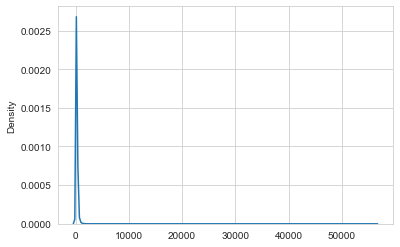

In [12]:
# Import the libraries
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
# matplotlib histogram
is_numeric_dtype(ber['BerRating'])


sns.set_style('whitegrid')
sns.kdeplot(np.array(ber['BerRating']), bw=0.5)



Boxplot and density plot not appearing as expected due to outliers.

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BerRating'>

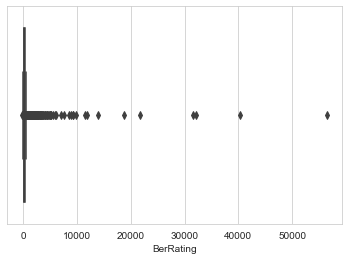

In [13]:
sns.boxplot(ber['BerRating'])


Find outliers three standard deviations from the mean, beyond the 99.7% or 0.3% of expected values.

In [14]:
print("Highest allowed",ber['BerRating'].mean() + 3*ber['BerRating'].std())
print("Lowest allowed",ber['BerRating'].mean() - 3*ber['BerRating'].std())

Highest allowed 769.7982060534331
Lowest allowed -295.88333674824037


Outliers detected 12161. All G rated buildings

Isolate outliers

In [15]:
berOutliers = ber[ (ber['BerRating'] > (ber['BerRating'].mean() + 3*ber['BerRating'].std() )) |
    (ber['BerRating'] < (ber['BerRating'].mean() - 3*ber['BerRating'].std() )) ]

In [48]:
berOutliers.groupby(['EnergyRating']).count()


,index,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,...,RoomInRoofArea,PurposeOfRating,DateOfAssessment,FirstWallDescription,FirstWallArea,FirstWallUValue,FirstWallIsSemiExposed,FirstWallAgeBandId,FirstWallTypeId,SA_Code
EnergyRating,,,,,,,,,,,,,,,,,,,,,
G,12161,12161,12161,12161,12161,12161,12161,12161,12161,12161,...,12161,12161,12161,7530,12158,12158,12158,12155,12158,7121


Isolate normalised dataset, without outliers.

In [16]:
berNormal = ber[ (ber['BerRating'] <= (ber['BerRating'].mean() + 3*ber['BerRating'].std() )) &
    (ber['BerRating'] >= (ber['BerRating'].mean() - 3*ber['BerRating'].std() )) ]

Recheck normalised BER dataset.

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

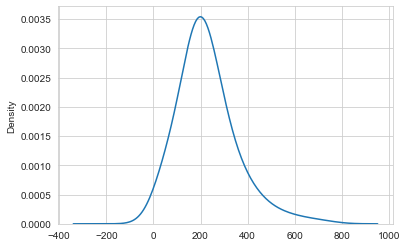

In [17]:
sns.kdeplot(np.array(berNormal['BerRating']), 
#log_scale=True,
bw=0.5)


C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

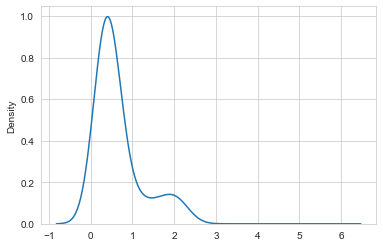

In [18]:
sns.kdeplot(np.array(berNormal['UValueWall']),
#log_scale=True, 
bw=0.5)



C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

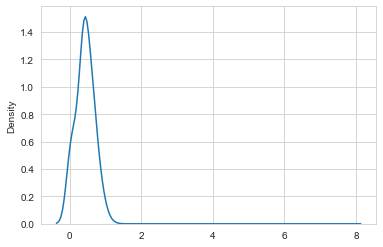

In [19]:
sns.kdeplot(np.array(berNormal['UValueFloor']), bw=0.5)


C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

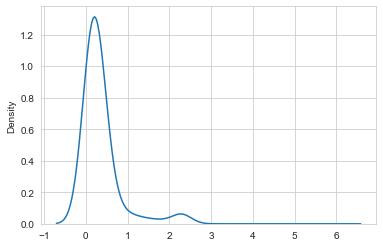

In [20]:
sns.kdeplot(np.array(berNormal['UValueRoof']), bw=0.5)

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BerRating'>

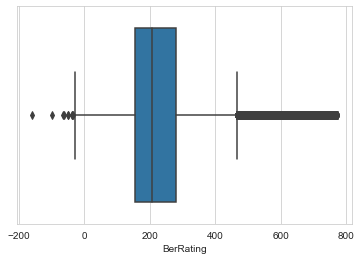

In [21]:
sns.boxplot(berNormal['BerRating'])


In [22]:
import math
#is_string_dtype(berNormal['BerRating'])
is_string_dtype(berNormal['UValueWall'])

False

In [23]:
berNormal.dtypes

index                                int64
CountyName                          object
DwellingTypeDescr                   object
Year_of_Construction                 int64
TypeofRating                        object
EnergyRating                        object
BerRating                          float64
GroundFloorArea(sq m)              float64
UValueWall                         float64
UValueRoof                         float64
UValueFloor                        float64
UValueWindow                       float64
UvalueDoor                         float64
WallArea                           float64
RoofArea                           float64
FloorArea                          float64
WindowArea                         float64
DoorArea                           float64
NoStoreys                            int64
CO2Rating                          float64
MainSpaceHeatingFuel                object
MainWaterHeatingFuel                object
HSMainSystemEfficiency             float64
MultiDwelli

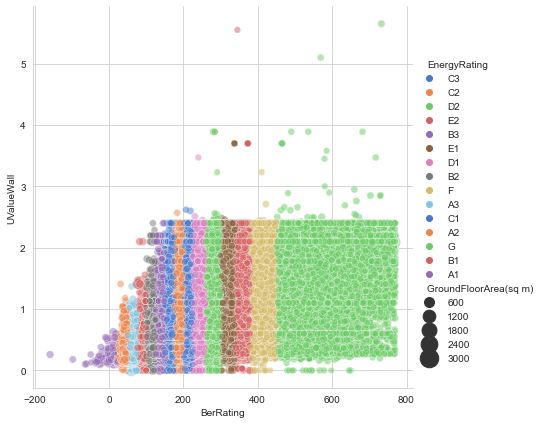

In [49]:


#ax.set(xscale="log", yscale="log")
sns.relplot(x = "BerRating", y= "UValueWall", 
hue="EnergyRating", 
size="GroundFloorArea(sq m)",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, 
            #ax = ax, 
            data= berNormal )



In [25]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [26]:
X = berNormal[['BerRating', 
'UValueWindow']]
#'GroundFloorArea(sq m)']]
y_pred = clf.fit_predict(X)

In [27]:
X_scores = clf.negative_outlier_factor_


convert from numpy to pandas to remove -1 

In [46]:
y_pred.groupby(['0']).count()

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

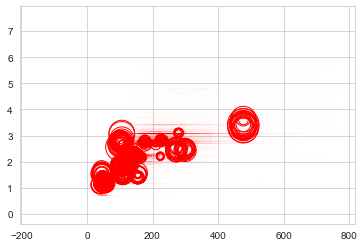

In [45]:
#sns.relplot(x = "BerRating", y= "UValueWindow",
# hue="DwellingTypeDescr",
#  size="GroundFloorArea(sq m)",
           # sizes=(40, 400), alpha=.5, palette="muted",
           # height=6, 
            #ax = ax, 
           # data= X )

#plt.scatter(X.iloc[:, 0].values, X.iloc[:, 1].values, color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
#radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(    X.iloc[:, 0].values,   X.iloc[:, 1].values,
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)

TypeError: '(slice(None, None, None), 'BerRating')' is an invalid key